<a href="https://www.kaggle.com/code/golammostofas/pure-dbscan?scriptVersionId=140420918" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iadatasets/ID3/car.data
/kaggle/input/iadatasets/ID3/breast-cancer.data
/kaggle/input/iadatasets/dbscan/ds1.txt
/kaggle/input/iadatasets/dbscan/spiral.txt
/kaggle/input/iadatasets/dbscan/Aggregation.txt
/kaggle/input/iadatasets/kmeans-SOM/jain.txt
/kaggle/input/iadatasets/kmeans-SOM/unbalance.txt
/kaggle/input/iadatasets/kmeans-SOM/Aggregation.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/data_banknote_authentication.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/Compound.txt
/kaggle/input/iadatasets/knn-CNN-NNSRM/wine.txt
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/car.data
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/breast-cancer.data
/kaggle/input/iadatasets/Aprendizagem Probabili╠üstica/balance-scale.data
/kaggle/input/iadatasets/Perceptron-Adaline/base2.txt
/kaggle/input/iadatasets/Perceptron-Adaline/base1.txt
/kaggle/input/iadatasets/C4.5/diagnosisAccute.data
/kaggle/input/iadatasets/C4.5/abaloneFormatada.txt
/kaggle/input/iadatasets/C4.5/abalone.data

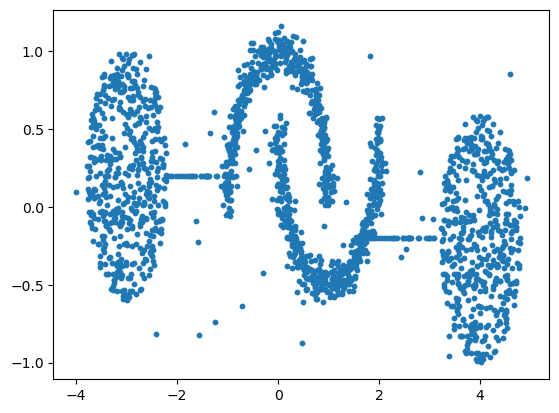

In [3]:
df = pd.read_pickle("/kaggle/input/dataset-for-dbscan/dbscan2000.pkl")
plt.scatter(df[:,0] , df[:,1], s=10)
data = pd.DataFrame(dict(X=df[:, 0], Y=df[:, 1])) 
data = data.values

In [4]:
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [ 0  1 -1 ...  2  0  2]


       idx  cluster
0        0        0
1        1        1
2        2       -1
3        3        0
4        4        0
...    ...      ...
1995  1995       -1
1996  1996        0
1997  1997        2
1998  1998        0
1999  1999        2

[2000 rows x 2 columns]


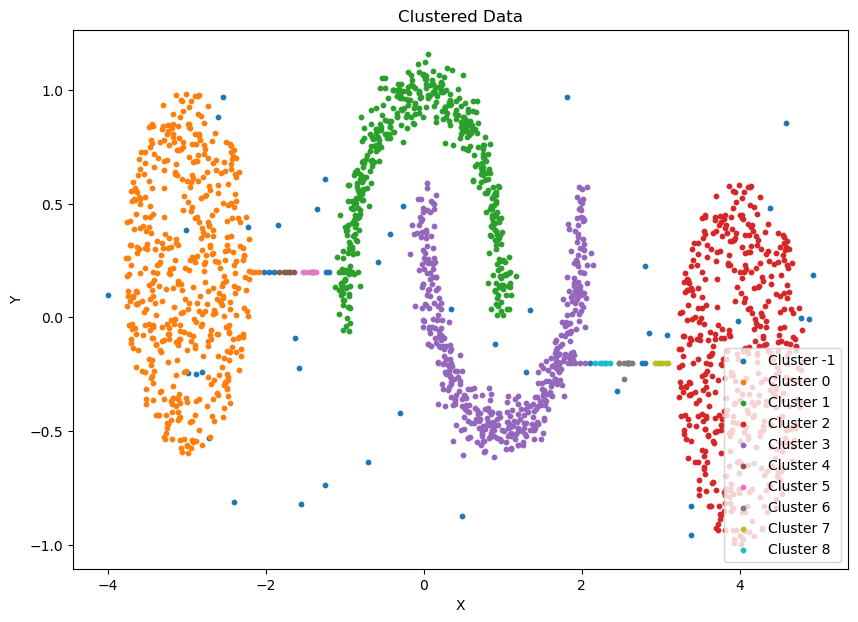

In [5]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(df[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], df[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 50, 500, 455, 499, 457,   6,  10,  11,   6,   6])

> # Moon DataSet

In [7]:

X, y= make_moons(n_samples=500, noise=0.06, random_state=0)

data = pd.DataFrame(dict(X=X[:, 0], Y=X[:, 1])) 
data = data.values
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)
dbscan.eps

Cluster labels: [ 0  1  1  1  1  0  1  1 -1  0  0  1  1  1  0  1  1  1  0  0  0  1  0  0
  0  1  0  1  0  0  1  0  0  0  1  1  1  1  1  0  1  0  1  0  0  0  0  1
  1  0  1  0  1  0  0  0  1  0  0  1  0  1  1  1  1  0  0  1  1  0  0  0
  1  1  0  1  1  0  1  1 -1  0 -1  0  1  1  1  0  1  0  0  1  1  0  0  1
  0  1  0  0  0  1  0  1 -1  1  0  0  1  0  1  0  0  0  1  1  1  1  0  0
  1  0  0  1  1  0  0  1  1  1  1  0  1  0  1  1  1  1  1  0  0  0  0  0
  1  0  1  1  0  0  0  1  0  1  0  0  0  0  1  0  1  0  0 -1  0  0  1  1
  1  1  1  0  1  1  1  0  1  0  1  1  1  0  0  1  0  1  1  1  1  0  1  1
  0  1  1  1  1  0  0  0  0  0  0  1  0  1  0  1  0  1  1  0  0  1  0  1
  0  0  0  1  0  0  0  0  1  1  0  0  0  0  1  0  1  0  1  1  1  0  0  1
  0  0  1  1  1  1  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  1  0
  1  1  1  0  0  1  1  0  1  1  0  0  0  1  1  1  0  1  0  0  0  0  1  0
  0  0  0  0  0  0  1  1  0  1  1  0  1  1  0  1  1  1  0  0  0  1  1  0
  0  0  0  1  0  1  0  0  1  1  1  

0.1

# Calculate evaluation metrics of Moon Dataset

In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
def evaluation(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    calinski_score = calinski_harabasz_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    print("Silhouette Score:", silhouette_avg)
    print("Calinski-Harabasz Score:", calinski_score)
    print("Davies-Bouldin Score:", davies_bouldin)

In [9]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.23194850196288408
Calinski-Harabasz Score: 159.02182104769875
Davies-Bouldin Score: 2.7650252868913907


     idx  cluster
0      0        0
1      1        1
2      2        1
3      3        1
4      4        1
..   ...      ...
495  495        1
496  496        0
497  497        0
498  498        0
499  499        0

[500 rows x 2 columns]


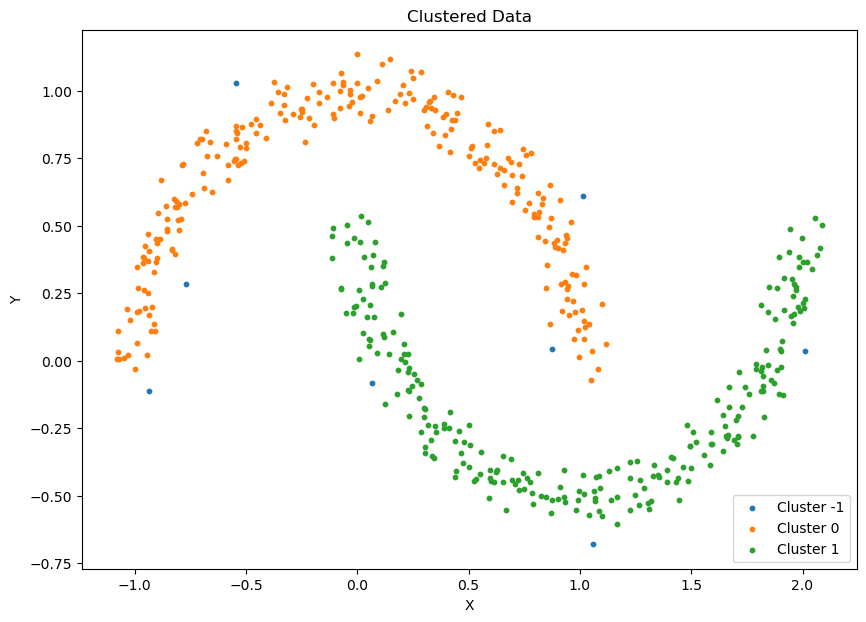

In [10]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([  8, 245, 247])

> # Circles Dataset

In [12]:
from sklearn import datasets
circle_df = datasets.make_circles(n_samples=500, noise=.09,factor=0.2, random_state=0)
X = circle_df[0]
data = X

In [13]:
eps = 0.1
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)
dbscan.eps

Cluster labels: [ 6  0  0  0  0 -1  0  0  1  1 -1  0  0  0  2  0  0  0  1 -1  3  0  4 -1
 13  0  5  0  6  4  0 -1 -1  7  0  0  0  0  0 -1  0 13  0 11  8 -1  3  0
  0  6  0  2  0  1 14  9  0 -1  4  0 10  0  0  0  0  7  9  0  0  8  1 -1
  0  0  2  0  0  6  0  0  0  4 -1 11  0  0  0 -1  0 -1 11  0  0  7 -1  0
 -1 -1 12  3  6  0  8  0 -1  0 -1 -1  0  1  0 -1 -1  9  0  0  0  0  3  7
  0 13 -1  0  0  4 12  0  0  0  0 -1  0 12  0  0  0  0  0  7 -1 13 -1  5
  0  9  0  0 -1 -1  1  0 14  0 14  5 12  5  0 -1  0 11 12  0  4  8  0  0
  0  0  0 -1  0  0  0  3  0 13  0  0  0  2  6  0 12  0  0  0  0 10  0  0
 10  0  0  0  0  6  5  7  1 -1  1  0 -1  0  4  0 12  0  0  1 -1  0  9  0
  5  1  9  0 15  6 -1  6  0  0  7 -1 -1  2  0 -1  0 -1  0  0  0 16  7  0
  7 -1  0  0  0  0  0  4 16 15  0  2 15 15  6 10 -1  7  0 11  8 15  0 15
  0  0  0  3  5  0  0  1  0  0 14  3  6  0  0  0  3  0 -1  3  3  4  0 -1
  5  3  4 14 -1  2  0  0 -1  0  0  8  0  0  5  0  0  0 -1  2 -1  0  0 -1
  1  1  5  0 -1  0 -1  4  0  0  0  

0.1

# Calculate evaluation metrics

In [14]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.3714099422718756
Calinski-Harabasz Score: 60.79946815552944
Davies-Bouldin Score: 3.461855947273488


     idx  cluster
0      0        6
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
495  495        0
496  496        7
497  497       -1
498  498       13
499  499       -1

[500 rows x 2 columns]


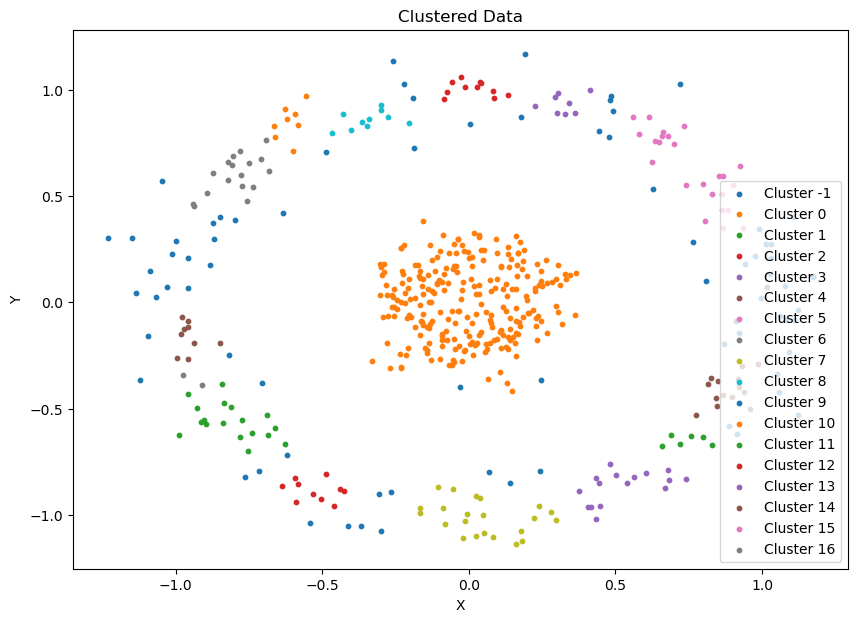

In [15]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [16]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 68, 248,  18,  10,  16,  14,  13,  17,  22,  10,   9,   8,   6,
        11,   8,   9,  11,   2])

> # Aggregation Dataset

In [17]:
df = pd.read_csv("/kaggle/input/iadatasets/dbscan/Aggregation.txt", sep="\t", header=None)[[0,1]]

In [18]:
df.info


<bound method DataFrame.info of          0      1
0    15.55  28.65
1    14.90  27.55
2    14.45  28.35
3    14.15  28.80
4    13.75  28.05
..     ...    ...
783   7.80   3.35
784   8.05   2.75
785   8.50   3.25
786   8.10   3.55
787   8.15   4.00

[788 rows x 2 columns]>

In [19]:
data = df.values

In [20]:
data

array([[15.55, 28.65],
       [14.9 , 27.55],
       [14.45, 28.35],
       ...,
       [ 8.5 ,  3.25],
       [ 8.1 ,  3.55],
       [ 8.15,  4.  ]])

In [21]:
eps = 1.0
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  2  2  2 -1 -1 -1
 -1  1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  

# Calculate evaluation metrics

In [22]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.21431978441678082
Calinski-Harabasz Score: 416.1744917987363
Davies-Bouldin Score: 1.7378131348744663


     idx  cluster
0      0       -1
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
783  783        8
784  784        8
785  785        8
786  786        8
787  787        8

[788 rows x 2 columns]


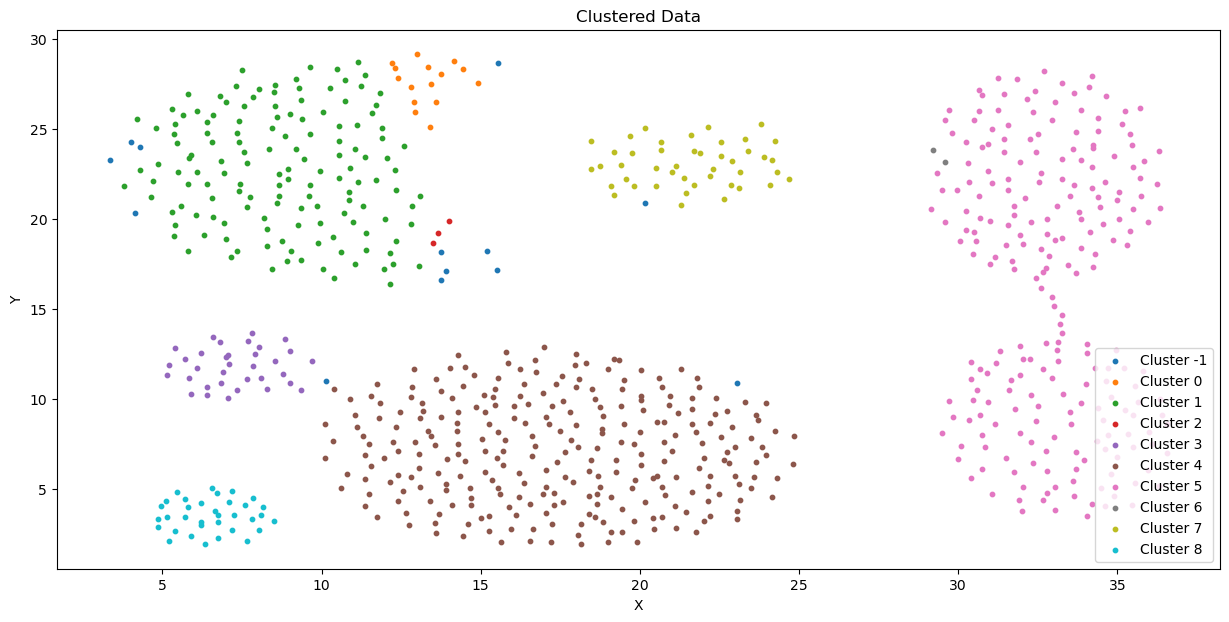

In [23]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(15, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [24]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 13,  15, 142,   3,  34, 271, 230,   2,  44,  34])

> # Compound DataSet

In [25]:
df = pd.read_csv("/kaggle/input/iadatasets/knn-CNN-NNSRM/Compound.txt", sep="\t", header=None)[[0,1]]
data = df.values

In [26]:
eps = 1.0
min_samples = 4

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  2  2
 -1 -1 -1 -1 -1 -1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1 -1
  2  2 -1 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  

# Calculate evaluation metrics

In [27]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.03386247320948692
Calinski-Harabasz Score: 141.0038823647434
Davies-Bouldin Score: 3.593762274863605


     idx  cluster
0      0       -1
1      1       -1
2      2       -1
3      3       -1
4      4       -1
..   ...      ...
394  394        4
395  395        4
396  396        4
397  397        4
398  398        4

[399 rows x 2 columns]


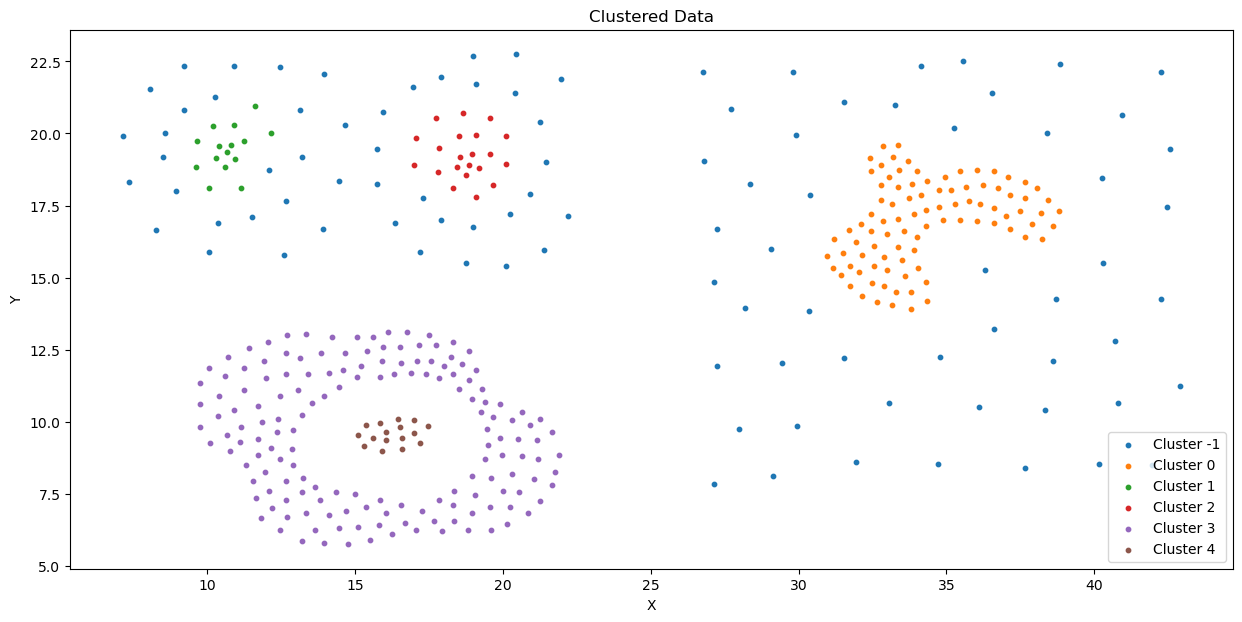

In [28]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(15, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [29]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 97,  92,  15,  21, 158,  16])

In [30]:
df = pd.read_csv("/kaggle/input/iadatasets/dbscan/spiral.txt", sep="\t", header=None)[[0,1]]
data = df.values

In [31]:
eps = 1.0
min_samples = 3

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(data)

print("Cluster labels:", dbscan.labels_)

Cluster labels: [-1  0  0  0  0  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2 -1 -1 -1 -1 -1 -1  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5]


# Calculate evaluation metrics

In [32]:
evaluation(data, dbscan.labels_)

Silhouette Score: -0.10229111819976693
Calinski-Harabasz Score: 15.389184611478365
Davies-Bouldin Score: 3.0949222708427295


     idx  cluster
0      0       -1
1      1        0
2      2        0
3      3        0
4      4        0
..   ...      ...
307  307        5
308  308        5
309  309        5
310  310        5
311  311        5

[312 rows x 2 columns]


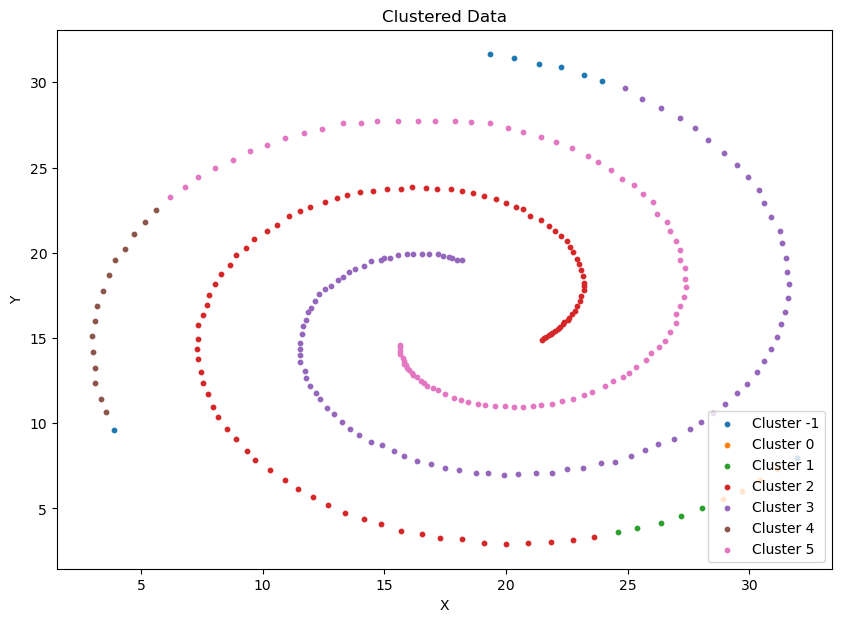

In [33]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], data[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [34]:
unique, counts = np.unique(cluster, return_counts=True)
counts

array([ 8,  4,  5, 96, 95, 15, 89])

# make Data point for analysis

In [35]:
data = np.array([[-1.5, 0.7], [-0.7, 0.6], [-0.5, 1.1], [-1, 1], [-1.5, 1.3], [-0.8, 1.3], [-0.5, 1.4], [-0.3, 1.7], [-0.1,1.5], [0, 1.9], [0.4, 1.7], [0.2,2.2], [-1, 2.5]])
X = data

In [36]:
dbscan = DBSCAN(eps=0.7, min_samples=5).fit(X)
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1])

# Calculate evaluation metrics

In [37]:
evaluation(data, dbscan.labels_)

Silhouette Score: 0.2776021407540803
Calinski-Harabasz Score: 2.3270033368680143
Davies-Bouldin Score: 0.530379880342927


    idx  cluster
0     0        0
1     1        0
2     2        0
3     3        0
4     4        0
5     5        0
6     6        0
7     7        0
8     8        0
9     9        0
10   10        0
11   11        0
12   12       -1


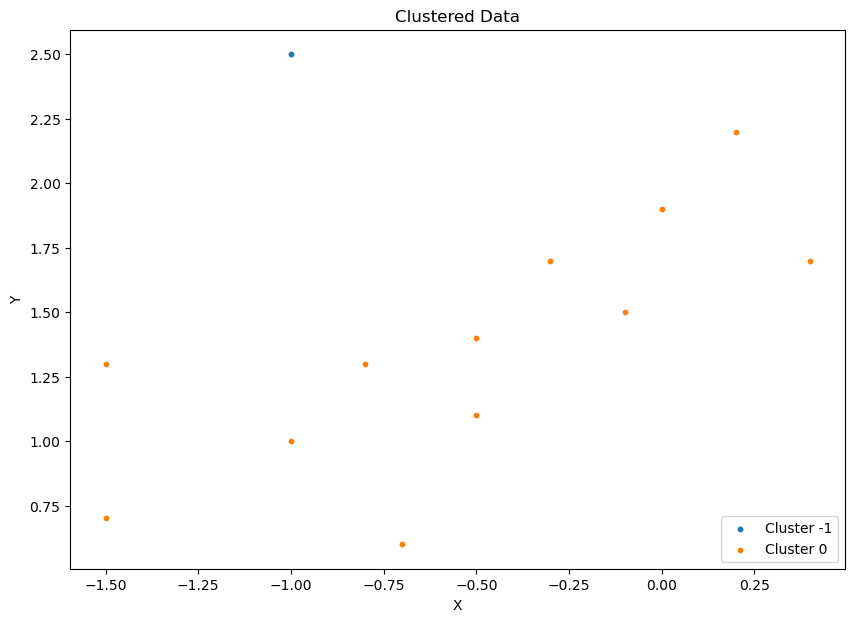

In [38]:
indx = [i for i in range(len(dbscan.labels_))]
cluster =  dbscan.labels_


cluster_df = pd.DataFrame(dict(idx=indx[:], cluster=cluster[:]))
print(cluster_df)
plt.figure(figsize=(10, 7))
for clust in np.unique(cluster):
    plt.scatter(X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 0], X[cluster_df["idx"][cluster_df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in np.unique(cluster)], loc="lower right")
plt.title('Clustered Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# THANK YOU...!
> **If this notebook helped you, don't forget to upvote...**